### Tree/Forest Challenges

You can examine the decision paths of an `sklearn` tree by generating `pydot` graphs as in the `sklearn` [documentation](http://scikit-learn.org/stable/modules/tree.html). It's sometimes tricky to get `pydot` working; see below for a possible install plan.

In [22]:
import numpy as np
import pandas as pd

import pickle

import pydotplus
from IPython.display import Image

In [37]:
def open_pickle(filename):
    with open(filename, 'rb') as picklefile:
        return pickle.load(picklefile)

In [81]:
def viz_tree(X, y, max_depth):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=4444)
    dt = DecisionTreeClassifier(random_state=16, max_depth=max_depth)
    dt.fit(X_train, y_train)
    y_pred = dt.predict(X_test)
    print classification_report(y_test, y_pred)
    
    dot_data = tree.export_graphviz(dt, out_file=None,
                               feature_names=X.columns,
                               class_names=['republican', 'democrat'],
                               filled=True)
    graph = pydotplus.graph_from_dot_data(dot_data)
    return Image(graph.create_png())

### Challenge 1

For the house of representative data set, fit and evaluate a decision tree classifier. Examine the rules your tree uses.

In [23]:
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

In [75]:
votes = open_pickle('data/votes.pkl')

In [76]:
votes[16].replace('republican', 0, inplace=True)
votes[16].replace('democrat', 1, inplace=True)

In [77]:
X_votes = votes
y_votes = X_votes.pop(16)

             precision    recall  f1-score   support

          0       0.96      0.96      0.96        54
          1       0.97      0.97      0.97        77

avg / total       0.97      0.97      0.97       131



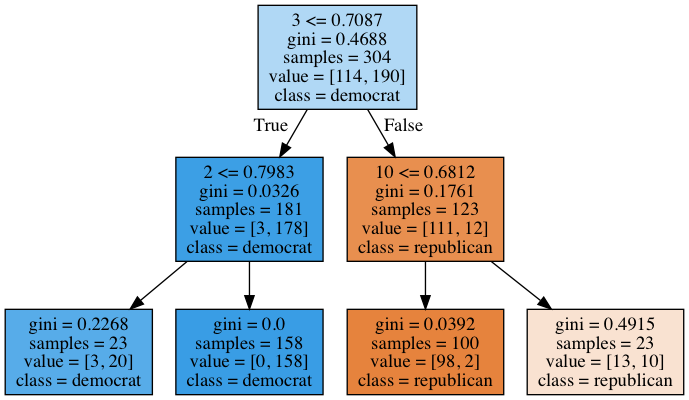

In [83]:
viz_tree(X_votes, y_votes, max_depth=2)

### Challenge 2

Fit and evaluate a decision tree classifier for your movie dataset. Examine the rules your tree uses.

In [63]:
X_movies = open_pickle('data/movies_X.pkl')
y_movies = open_pickle('data/movies_y.pkl')

             precision    recall  f1-score   support

        0.0       0.70      0.80      0.74        20
        1.0       0.43      0.30      0.35        10

avg / total       0.61      0.63      0.61        30



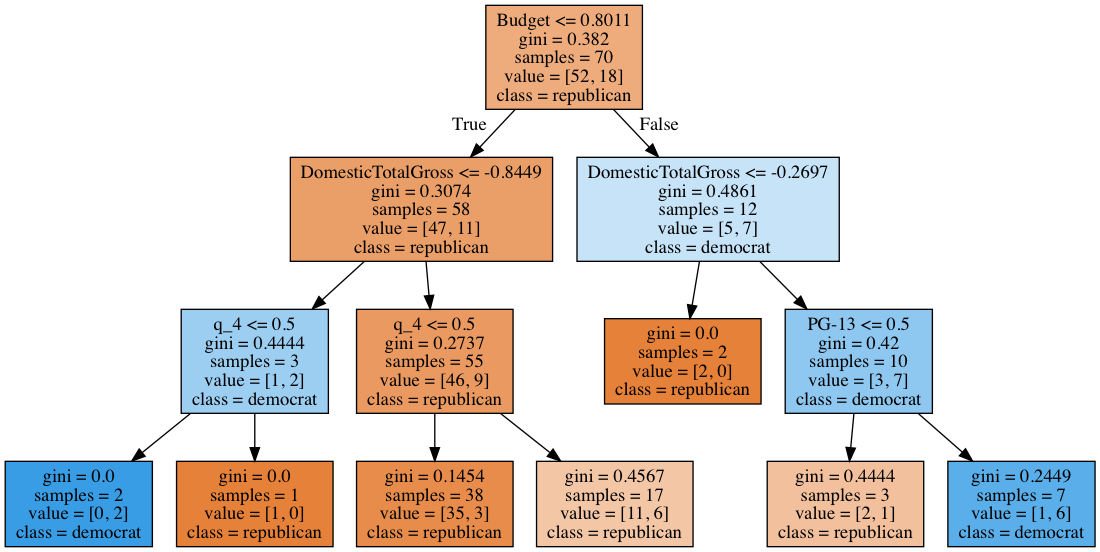

In [85]:
viz_tree(X_movies, y_movies, 3)

### Challenge 3 _(Optional but recommended)_

Tackle the [Titanic Survivors](https://www.kaggle.com/c/titanic-gettingStarted) kaggle competition with decision trees. Look at your splits; how does your tree decide?